### 4 задание

In [1]:
from scipy.stats import norm

In [2]:
import math

In [3]:
stat = (9.57-9.5)/(0.4/math.sqrt(160))

In [5]:
round(2*(1-norm(0,1).cdf(stat)),4)

0.0269

### 6 Задание

In [7]:
from sklearn.model_selection import train_test_split 

In [9]:
import pandas as pd

In [10]:
data = pd.read_table("diamonds.txt")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [11]:
data.head(2)

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31


In [12]:
target = data.price

In [13]:
data= data.drop("price", axis =1 )

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data,target, random_state = 1)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
clf_1 = LinearRegression()
clf_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
clf_2 = RandomForestRegressor(n_estimators = 10, random_state = 1)
clf_2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [21]:
pred_1 = clf_1.predict(X_test)
pred_2 = clf_2.predict(X_test)

In [36]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [56]:
diff_1 = np.asarray([abs(y-x) for x,y in zip(pred_1, y_test)])

In [57]:
diff_2 = np.asarray([abs(y-x) for x,y in zip(pred_2, y_test)])

In [58]:
import scipy.stats as stats

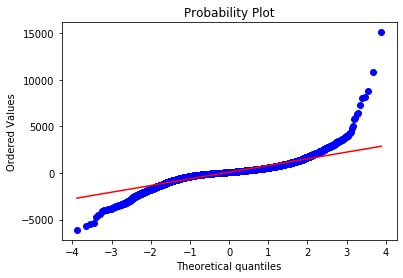

In [59]:
stats.probplot(diff_1 - diff_2, dist = "norm", plot = pylab)
pylab.show()

In [60]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(diff_1 - diff_2))

Shapiro-Wilk normality test, W-statistic: 0.844494, p-value: 0.000000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [61]:
stats.ttest_ind(diff_1, diff_2)

Ttest_indResult(statistic=6.205418446787019, pvalue=5.534492084106771e-10)

In [62]:
from statsmodels.stats.weightstats import DescrStatsW

In [63]:
mean_1 = diff_1.mean()
mean_2 = diff_2.mean()
mean_1, mean_2

(890.3764004285604, 802.9205172724115)

In [64]:
DescrStatsW(diff_2 - diff_1).tconfint_mean()

(-100.62452098634296, -74.28724532595444)

In [65]:
round(-74)

-74